In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os, cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [106]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!mkdir -p /root/.config/kaggle
!cp ~/.kaggle/kaggle.json /root/.config/kaggle/

In [107]:
import kaggle

In [108]:
!kaggle competitions download -c dogs-vs-cats

 97% 790M/812M [00:03<00:00, 259MB/s]
100% 812M/812M [00:03<00:00, 272MB/s]


In [109]:
! unzip -q dogs-vs-cats.zip

In [110]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [111]:
! rm sampleSubmission.csv test1.zip

In [112]:
! mkdir images

In [113]:
!mkdir images/cat

In [114]:
! mkdir images/dog

In [115]:
import shutil

In [116]:
source = 'train/'
dest_dog = 'images/dog'
dest_cat = 'images/cat'

for imgName in tqdm(os.listdir(source)):
  if imgName.startswith('cat'):
    shutil.copy(source +imgName, dest_cat)
  elif imgName.startswith('dog'):
    shutil.copy(source +imgName, dest_dog)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [117]:
len(os.listdir("images/dog"))

12500

In [118]:
len(os.listdir("images/cat"))

12500

In [134]:
os.makedirs("test", exist_ok=True)

In [135]:
dog = "train/dog.0.jpg"
img = tf.keras.utils.load_img(dog) # PIL
img_arr1 = tf.keras.utils.img_to_array(img)
print(img_arr1.shape)
img_arr = img_arr1.reshape((1,) + img_arr1.shape)
print(img_arr.shape)

(375, 499, 3)
(1, 375, 499, 3)


In [136]:
os.mkdir("aug")

In [137]:
i = 0
for batch in idg.flow(img_arr, batch_size=1, save_to_dir="aug"):
  i+=1
  if i>9: # give us 9 different aug of this image
    break

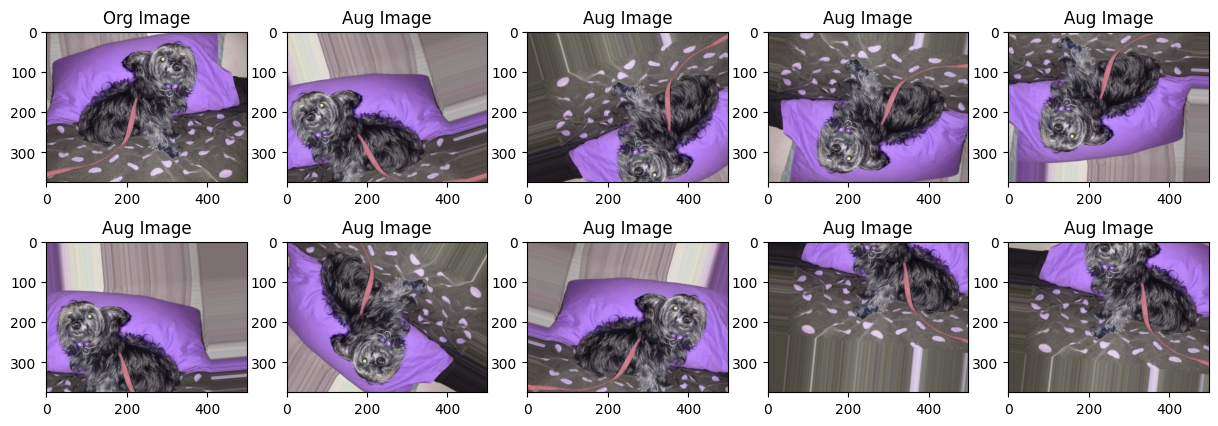

In [138]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 5, 1)
plt.imshow(cv2.imread(dog))
plt.title("Org Image")

for index, i in enumerate(os.listdir("aug"), 1):
  if index > 9:
    break
  plt.subplot(2, 5, 1 + index)
  plt.imshow(cv2.imread("aug/" + i))
  plt.title("Aug Image")

In [120]:
#Test Data:

test_dog = np.random.choice(os.listdir(dest_dog), 500, replace = False)
test_cat = np.random.choice(os.listdir(dest_cat), 500, replace = False)

In [124]:
# Move dogs
for imgName in test_dog:
    shutil.move(os.path.join(dest_dog, imgName), "test")

# Move cats
for imgName in test_cat:
    shutil.move(os.path.join(dest_cat, imgName), "test")

In [125]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                      validation_split = 0.1,
                                                      horizontal_flip = True,
                                                      vertical_flip = True,
                                                      height_shift_range = 0.25,
                                                      width_shift_range = 0.25,
                                                      rotation_range = 30)

In [126]:
len(os.listdir("test"))

1000

In [127]:
train_idg = idg.flow_from_directory("images",
                        target_size = (150,150),
                        batch_size = 64,
                        subset = 'training')

Found 21600 images belonging to 2 classes.


In [128]:
val_idg = idg.flow_from_directory("images",
                        target_size = (150,150),
                        batch_size = 64,
                        subset = 'validation')

Found 2400 images belonging to 2 classes.


In [130]:
#del model

In [131]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3), name = "InputLayer"))
model.add(tf.keras.layers.Flatten(name ="FlatLayer"))
model.add(tf.keras.layers.Dense(128, activation = 'relu', name ='HiddenLayer1'))
model.add(tf.keras.layers.Dense(16, activation = 'relu', name = 'HiddenLayer2'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax', name =  'OutputLayer'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FlatLayer (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642,226 (32.97 MB)

 Trainable params: 8,642,226 (32.97 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [133]:
model.fit(train_idg, batch_size = 64, epochs= 10,
          validation_data = val_idg)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 221s 651ms/step - acc: 0.5068 - loss: 0.7533 - val_acc: 0.5221 - val_loss: 0.6921
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 214s 631ms/step - acc: 0.5161 - loss: 0.6914 - val_acc: 0.5550 - val_loss: 0.6845
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 214s 632ms/step - acc: 0.5418 - loss: 0.6891 - val_acc: 0.5450 - val_loss: 0.6876
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 223s 659ms/step - acc: 0.5483 - loss: 0.6877 - val_acc: 0.5654 - val_loss: 0.6815
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 222s 657ms/step - acc: 0.5608 - loss: 0.6817 - val_acc: 0.5729 - val_loss: 0.6800
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 211s 626ms/step - acc: 0.5756 - loss: 0.6789 - val_acc: 0.5596 - val_loss: 0.6785
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 222s 656ms/step - acc: 0.5668 - loss: 0.6770 - val_acc: 0.5717 - val_loss: 0.6726
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 216s 638ms/step - acc: 0.5668 - loss: 0.6762 - val_acc: 0.5721 - val_loss: 0.6725
Epoch 9/10
338/338 ━━━━━

In [139]:
val_loss, val_acc = model.evaluate(val_idg)
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 545ms/step - acc: 0.5730 - loss: 0.6719
Validation Accuracy: 0.5779, Validation Loss: 0.6698


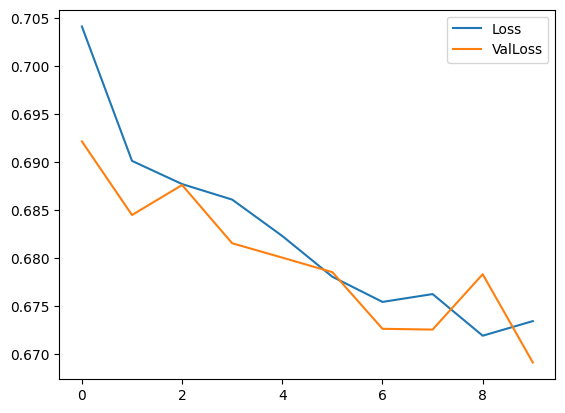

In [140]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["val_loss"], label="ValLoss")
plt.legend()

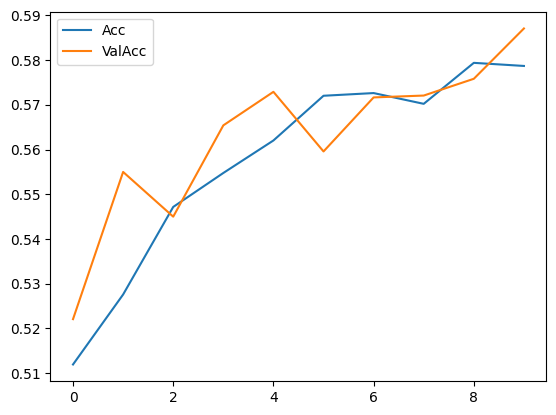

In [141]:
plt.plot(model.history.history["acc"], label="Acc")
plt.plot(model.history.history["val_acc"], label="ValAcc")
plt.legend()

In [143]:
img_path = "test/cat.10354.jpg"   # replace with any file
img = tf.keras.utils.load_img(img_path, target_size=(150,150))
img_arr = tf.keras.utils.img_to_array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

pred = model.predict(img_arr)
print("Prediction:", "Dog" if np.argmax(pred)==1 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Prediction: Cat


In [144]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_idg.classes
y_pred = model.predict(val_idg)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes, target_names=["Cat", "Dog"]))

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 548ms/step
[[472 728]
 [473 727]]
              precision    recall  f1-score   support

         Cat       0.50      0.39      0.44      1200
         Dog       0.50      0.61      0.55      1200

    accuracy                           0.50      2400
   macro avg       0.50      0.50      0.49      2400
weighted avg       0.50      0.50      0.49      2400



In [145]:
model.save("dog_cat_classifier.h5")

In [146]:
from tensorflow.keras.models import load_model
model = load_model("dog_cat_classifier.h5")